# Ex08 Seaborn

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
con = sqlite3.connect("../data/checking-logs.sqlite")
cur = con.cursor()

In [ ]:
data = pd.read_sql("""
            SELECT uid, timestamp, numTrials
            FROM checker
            WHERE
                status = 'ready'
                AND uid LIKE 'user%'
                AND labname = 'project1'
            
            """
            ,con, parse_dates='timestamp')
data

,uid,timestamp,numTrials
0,user_4,2020-04-17 05:19:02.744528,1
1,user_4,2020-04-17 05:22:45.549397,2
2,user_4,2020-04-17 05:34:24.422370,3
3,user_4,2020-04-17 05:43:27.773992,4
4,user_4,2020-04-17 05:46:32.275104,5
...,...,...,...
946,user_19,2020-05-15 10:22:39.698523,26
947,user_19,2020-05-15 10:22:46.248162,27
948,user_19,2020-05-15 10:23:18.043212,28
949,user_28,2020-05-15 10:38:14.430013,27


In [4]:
data['timestamp'] = data.timestamp.dt.date

In [5]:
plot_data = data.groupby(['uid','timestamp'], as_index = False).numTrials.max()
plot_data

,uid,timestamp,numTrials
0,user_1,2020-05-14,11
1,user_10,2020-05-12,7
2,user_10,2020-05-13,21
3,user_10,2020-05-14,59
4,user_11,2020-05-03,1
...,...,...,...
89,user_4,2020-05-13,137
90,user_4,2020-05-14,164
91,user_6,2020-05-13,1
92,user_6,2020-05-14,2


In [6]:
plot_data[plot_data.uid == 'user_4']

,uid,timestamp,numTrials
78,user_4,2020-04-17,7
79,user_4,2020-04-19,11
80,user_4,2020-04-23,20
81,user_4,2020-04-24,27
82,user_4,2020-05-03,35
83,user_4,2020-05-04,48
84,user_4,2020-05-05,53
85,user_4,2020-05-07,71
86,user_4,2020-05-08,83
87,user_4,2020-05-11,87


/tmp/ipykernel_20155/822956169.py:4: UserWarning: 
The palette list has fewer values (6) than needed (27) and will cycle, which may produce an uninterpretable plot.
  plot = sns.lineplot(data=data,x='timestamp',y='numTrials'


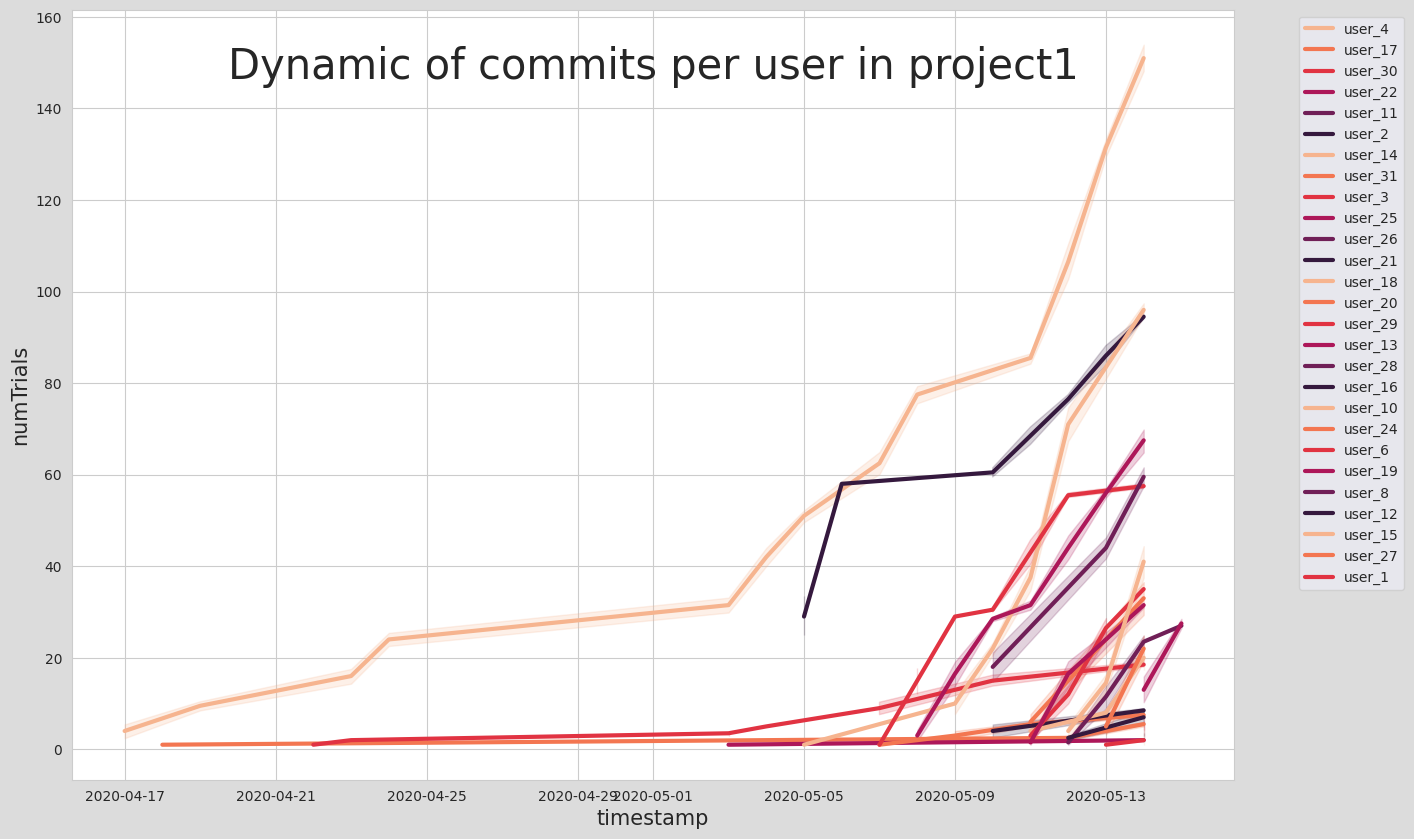

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
fig.patch.set_facecolor('#DCDCDC')
palette = sns.color_palette("rocket_r")
plot = sns.lineplot(data=data,x='timestamp',y='numTrials'
                    ,hue='uid',
                    palette=palette,
                    style = sns.set_style('darkgrid'),
                    ax = ax, linewidth=3)

sns.set_style('darkgrid')
ax.set_title('Dynamic of commits per user in project1', fontsize = 30, y = 0.9)
ax.set_xlabel(xlabel= 'timestamp', fontdict={'size':15})
ax.set_ylabel(ylabel= 'numTrials', fontdict={'size':15})
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



* Какой пользователь был лидером по количеству коммитов почти все время?

Ответ: user_4

* Какой пользователь был лидером только короткий промежуток времени?

Ответ: user_2

In [8]:
con.close()